In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Data Loading

In [2]:
df = pd.read_csv('insurance_modified.csv')

In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,428,35.0,female,28.9,97.0,yes,1,no,southeast,17265.45
1,1088,44.0,male,29.6,91.0,yes,0,no,southwest,11911.89
2,669,39.0,male,37.5,90.0,yes,2,no,southeast,16779.90
3,573,54.0,female,25.0,81.0,yes,2,no,northwest,15381.97
4,116,26.0,female,26.3,87.0,yes,0,no,southeast,15419.35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1367 non-null   int64  
 1   age            1327 non-null   float64
 2   gender         1367 non-null   object 
 3   bmi            1327 non-null   float64
 4   bloodpressure  1327 non-null   float64
 5   diabetic       1367 non-null   object 
 6   children       1367 non-null   int64  
 7   smoker         1367 non-null   object 
 8   region         1364 non-null   object 
 9   claim          1367 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 106.9+ KB


In [5]:
df.shape
# 1340 rows and 10 cols

(1367, 10)

### Data Exploration & Cleaning

In [6]:
pd.set_option("display.float_format" , "{:.2f}".format)

In [7]:
sns.set(style = 'whitegrid' , palette = 'Set2' , font_scale = 1.1)

In [8]:
df.duplicated().sum()
# Check for duplicates

np.int64(27)

In [9]:
df.isna().sum()
# Check for missing values

Id                0
age              40
gender            0
bmi              40
bloodpressure    40
diabetic          0
children          0
smoker            0
region            3
claim             0
dtype: int64

##### since the numbers are of small size we can drop it 

In [10]:
df.dropna(inplace = True)
# Drop rows with missing values

In [11]:
df = df.drop_duplicates()


In [12]:
df.shape

(1220, 10)

In [13]:
df.isna().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [14]:
df.describe( include='all')
# Show summary statistics

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1220.00,1220.00,1220,1220.00,1220.00,1220,1220.00,1220,1220,1220.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,no,NaN,no,southeast,NaN
freq,NaN,NaN,611,NaN,NaN,644,NaN,969,412,NaN
mean,671.83,38.06,NaN,30.62,94.20,NaN,1.11,NaN,NaN,14362.13
std,387.11,11.05,NaN,6.14,11.45,NaN,1.21,NaN,NaN,8044.59
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,500.00
25%,336.75,29.00,NaN,26.18,86.00,NaN,0.00,NaN,NaN,7566.92
50%,673.50,38.00,NaN,30.30,92.00,NaN,1.00,NaN,NaN,14104.81
75%,1008.25,47.00,NaN,34.62,99.00,NaN,2.00,NaN,NaN,18439.78


### Exploratory Data Analysis

##### Numeric Column Histograms

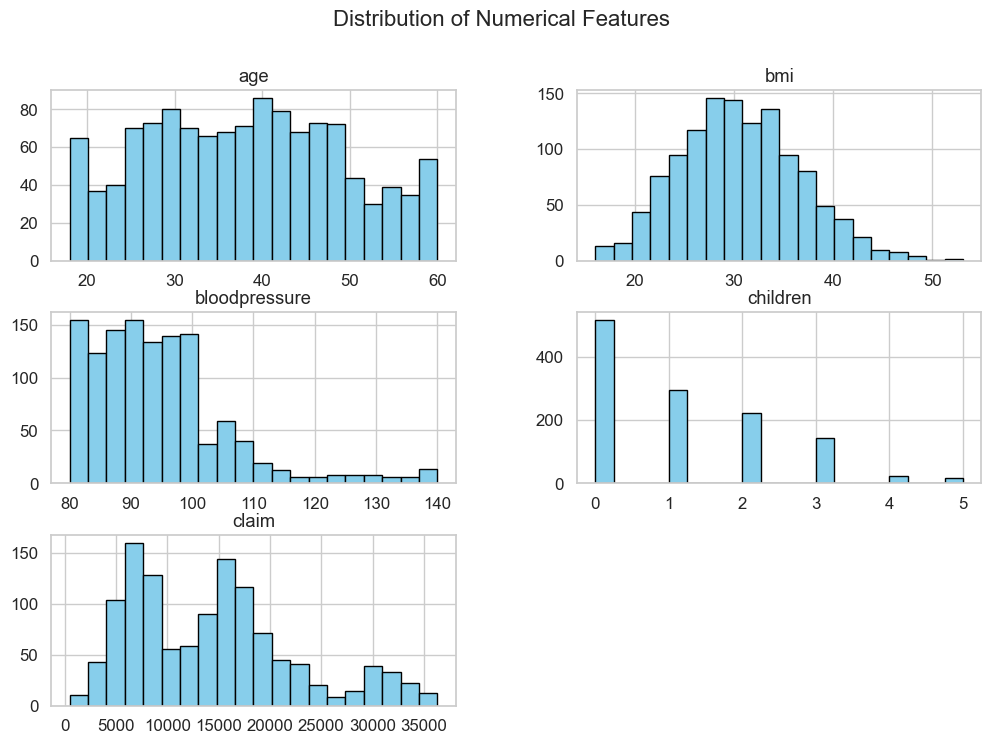

In [15]:
numeric_cols = ['age' , 'bmi' , 'bloodpressure' , 'children' , 'claim']
df[numeric_cols].hist(bins = 20 , figsize=(12,8) , color = 'skyblue' , edgecolor = "black")
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

##### Categorical Value Counts

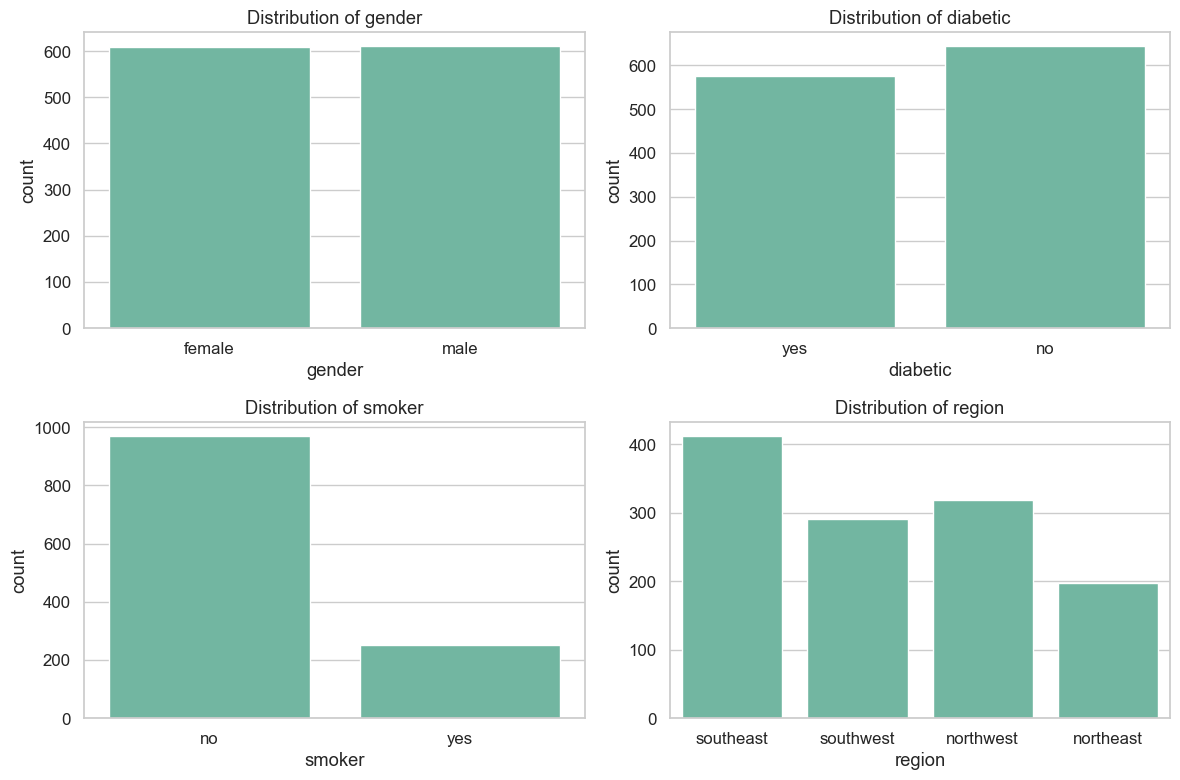

In [16]:
cat_cols = ['gender', 'diabetic', 'smoker', 'region']

plt.figure(figsize = (12,8))

for i,col in enumerate(cat_cols , 1):
    plt.subplot(2,2,i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [17]:
# Group by gender and smoker to get claim mean
df.groupby(['gender', 'smoker'])['claim'].mean().round(2)

gender  smoker
female  no       11401.55
        yes      27144.19
male    no       10917.33
        yes      26359.03
Name: claim, dtype: float64

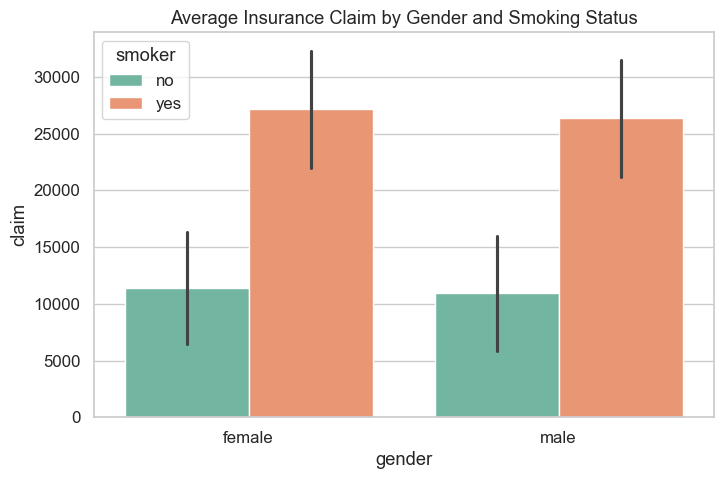

In [18]:
plt.figure(figsize = (8,5))

sns.barplot(data=df, x='gender', y='claim', hue='smoker', estimator='mean', errorbar='sd')
plt.title('Average Insurance Claim by Gender and Smoking Status')
plt.show()

In [19]:
pivot_region_diabetic = df.groupby(['region' , 'diabetic'] )["claim"].mean().unstack()

In [20]:
pivot_region_diabetic

diabetic,no,yes
region,,
northeast,11035.10,21482.61
northwest,8170.43,17680.16
southeast,11428.80,20046.97
southwest,9205.81,18375.65


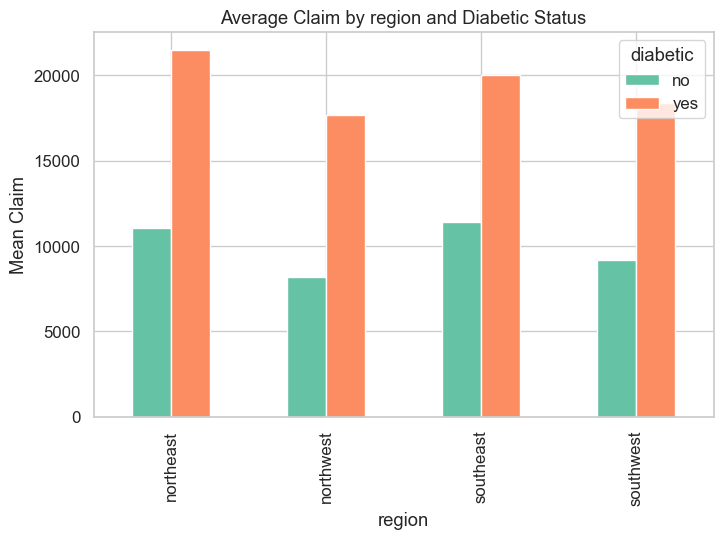

In [21]:
pivot_region_diabetic.plot(kind = 'bar' , figsize = (8,5))
plt.title("Average Claim by region and Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [22]:
pivot_table = pd.pivot_table(df , values = 'claim' , index = 'region' , columns = 'smoker' , aggfunc = 'mean')
pivot_table

smoker,no,yes
region,,
northeast,11287.78,27897.73
northwest,9767.08,24955.66
southeast,12641.15,27597.57
southwest,10609.66,25799.25


In [23]:
pivot_table = pd.pivot_table(
    df, values="claim",
    index="children", columns="diabetic",
    aggfunc="mean"
)
pivot_table

diabetic,no,yes
children,,
0,9366.08,18491.11
1,9476.81,18896.47
2,10852.35,19870.97
3,11323.62,21782.31
4,11709.79,20594.32
5,9558.24,21206.30


In [24]:
df[numeric_cols].corr()

,age,bmi,bloodpressure,children,claim
age,1.00,-0.04,-0.07,-0.03,-0.00
bmi,-0.04,1.00,0.16,0.01,0.04
bloodpressure,-0.07,0.16,1.00,-0.03,0.33
children,-0.03,0.01,-0.03,1.00,0.10
claim,-0.00,0.04,0.33,0.10,1.00


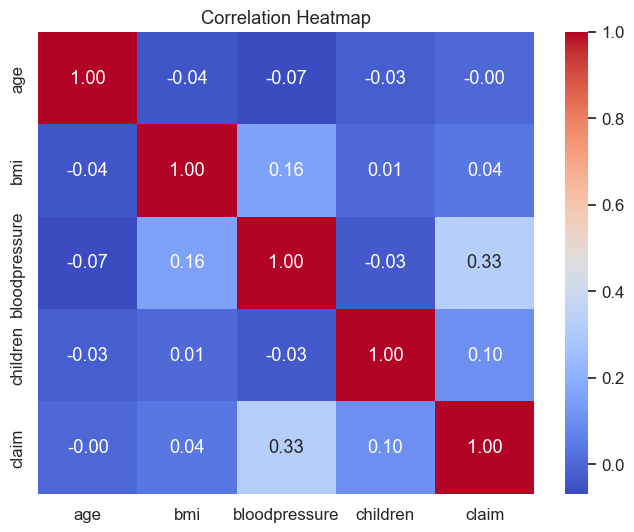

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


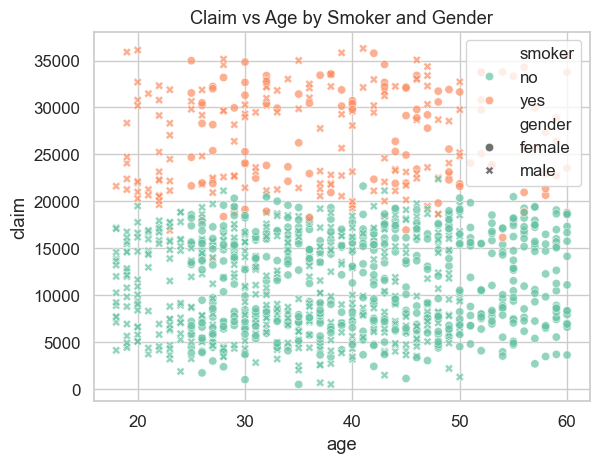

In [26]:
sns.scatterplot(
    data=df, x="age", y="claim",
    hue="smoker", style="gender", alpha=0.7
)
plt.title("Claim vs Age by Smoker and Gender")
plt.show()



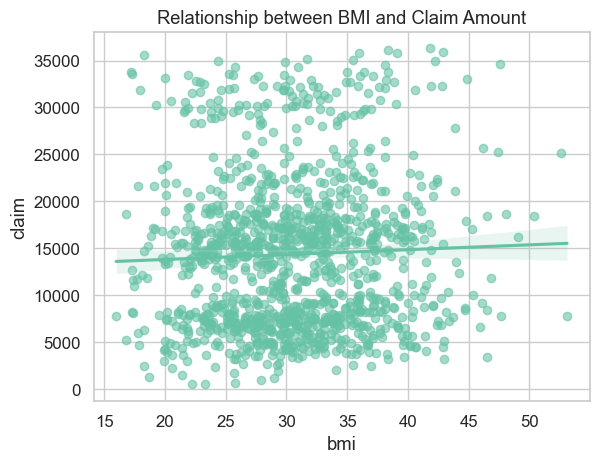

In [27]:
sns.regplot(
    data=df, x="bmi", y="claim",
    scatter_kws={"alpha":0.6}
)
plt.title("Relationship between BMI and Claim Amount")
plt.show()


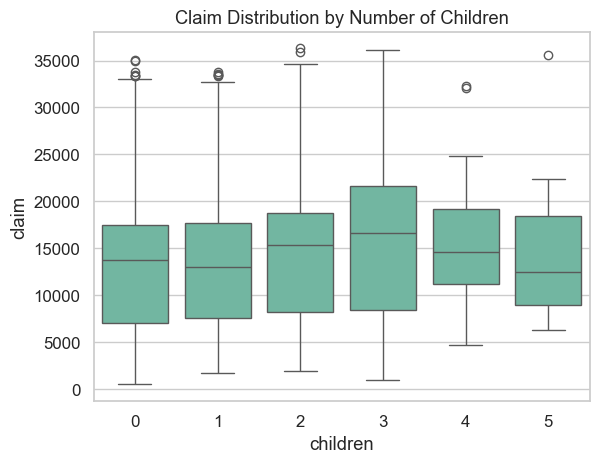

In [28]:
sns.boxplot(data=df, x="children", y="claim")
plt.title("Claim Distribution by Number of Children")
plt.show()


In [29]:
# Feature Engineering
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 30, 45, 60, 102],
    labels=["<18", "18-30", "31-45", "46-60", "60+"]
)


In [30]:
df["age_group"].value_counts()

age_group
31-45    508
18-30    350
46-60    347
<18       15
60+        0
Name: count, dtype: int64

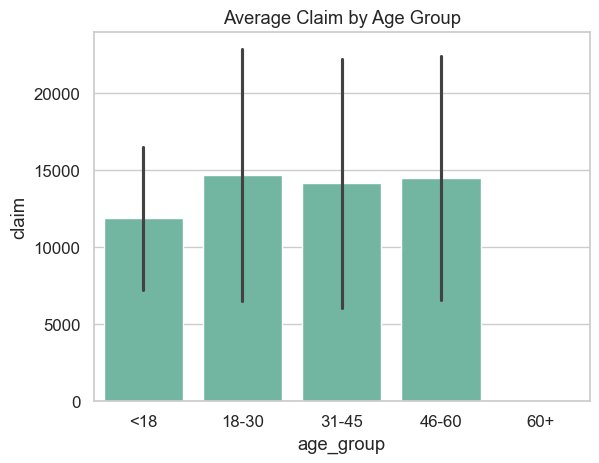

In [31]:

sns.barplot(
    data=df, x="age_group", y="claim",
    estimator="mean", errorbar="sd"
)
plt.title("Average Claim by Age Group")
plt.show()

In [32]:
df["bmi_category"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)
df["bmi_category"].value_counts()

bmi_category
Obese          640
Overweight     351
Normal         208
Underweight     21
Name: count, dtype: int64

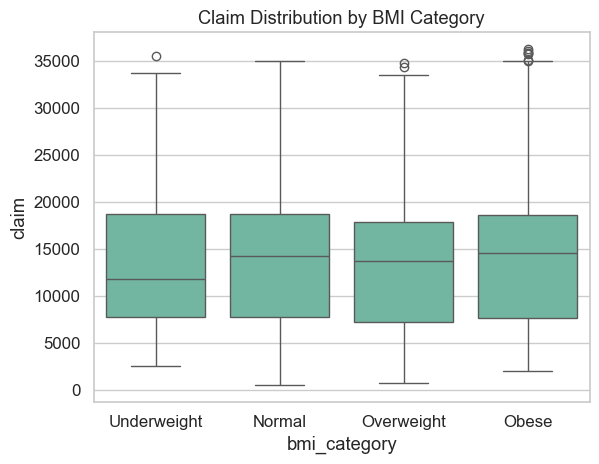

In [33]:
sns.boxplot(data=df, x="bmi_category", y="claim")
plt.title("Claim Distribution by BMI Category")
plt.show()

In [34]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x == "Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()
region_stats

,region,smoker_rate,mean_claim
0,northeast,0.00,16153.32
1,northwest,0.00,12433.41
2,southeast,0.00,15654.21
3,southwest,0.00,13428.35


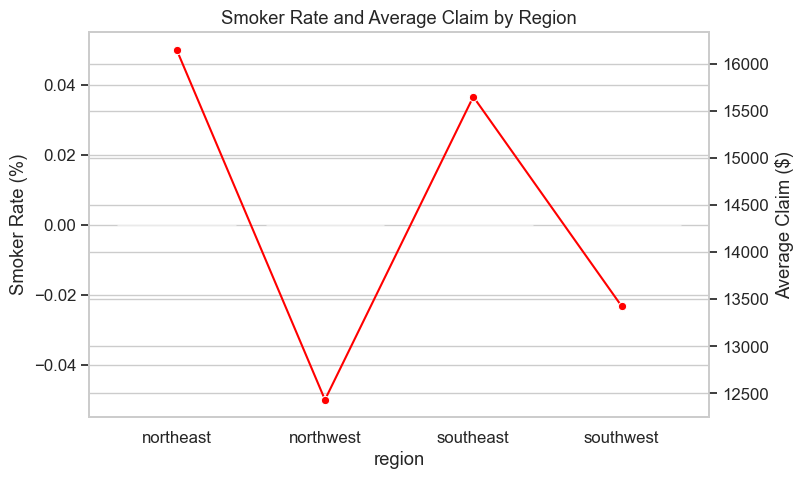

In [35]:
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.barplot(data=region_stats, x="region", y="smoker_rate", alpha=0.6, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", marker="o", color="red", ax=ax2)
ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate and Average Claim by Region")
plt.show()

In [36]:
# Data preprocessing and saving
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [37]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [38]:
# Preparing Feature and Target Matrices# Select features and target
X = df[['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker']]
y = df['claim']



In [39]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,35.00,female,28.90,97.00,yes,1,no
1,44.00,male,29.60,91.00,yes,0,no
2,39.00,male,37.50,90.00,yes,2,no
3,54.00,female,25.00,81.00,yes,2,no
4,26.00,female,26.30,87.00,yes,0,no
...,...,...,...,...,...,...,...
1362,38.00,female,25.30,104.00,yes,1,yes
1363,39.00,female,27.60,104.00,yes,1,yes
1364,36.00,female,30.20,130.00,no,1,yes
1365,37.00,female,33.40,84.00,yes,0,no


In [40]:
# Encode categorical features: 'gender', 'diabetic', 'smoker'
cat_cols = ['gender', 'diabetic', 'smoker']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    joblib.dump(le, f'label_encoder_{col}.pkl')

C:\Users\Ashlesh_D\AppData\Local\Temp\ipykernel_2788\3028679159.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Ashlesh_D\AppData\Local\Temp\ipykernel_2788\3028679159.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Ashlesh_D\AppData\Local\Temp\ipykernel_2788\3028679159.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [41]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,35.00,0,28.90,97.00,1,1,0
1,44.00,1,29.60,91.00,1,0,0
2,39.00,1,37.50,90.00,1,2,0
3,54.00,0,25.00,81.00,1,2,0
4,26.00,0,26.30,87.00,1,0,0
...,...,...,...,...,...,...,...
1362,38.00,0,25.30,104.00,1,1,1
1363,39.00,0,27.60,104.00,1,1,1
1364,36.00,0,30.20,130.00,0,1,1
1365,37.00,0,33.40,84.00,1,0,0


In [42]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [43]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


In [44]:
# Scaling Numerical Features
num_cols = ['age', 'bmi', 'bloodpressure', 'children']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

### Model Building

In [45]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [46]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

In [47]:
results= {}

#### Training and Evaluating

In [48]:
# Random Forest Regression (with Grid Search)
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_params = {
    'n_estimators': [200, 400, 600],       # 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
results['Random Forest'] = evaluate_model(best_rf, X_test, y_test)
print('Random Forest is completed, best parameters:', rf_grid.best_params_)


Random Forest is completed, best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}


In [49]:
results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
results_df

,R2,MAE,RMSE
Random Forest,0.93,1800.74,2196.35


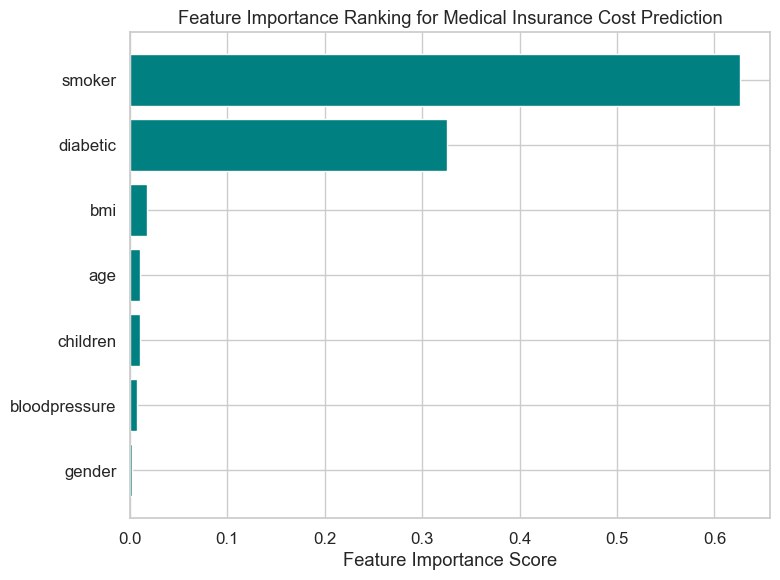

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
importances = best_rf.feature_importances_
features = X.columns  # adjust if needed

# Sort values
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], color='teal')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance Ranking for Medical Insurance Cost Prediction")
plt.tight_layout()

# Save figure for report
plt.savefig("feature_importance.png", dpi=300)
plt.show()


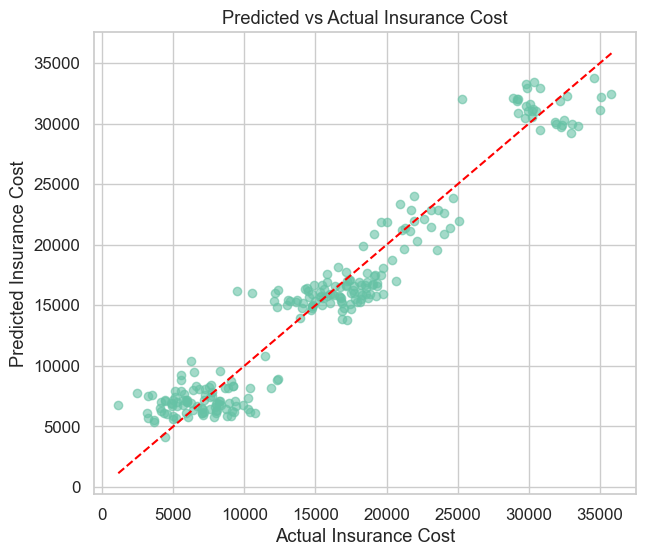

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
y_pred = best_rf.predict(X_test)

# Create the plot
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line

plt.xlabel("Actual Insurance Cost")
plt.ylabel("Predicted Insurance Cost")
plt.title("Predicted vs Actual Insurance Cost")
plt.grid(True)

plt.show()


In [50]:
models = {
    "Random Forest" : best_rf,
}

In [51]:
best_r2 = results_df["R2"].max()


In [52]:
best_r2

np.float64(0.9328222718473881)

In [53]:
top_model = results_df[results_df["R2"] == best_r2]

In [54]:
top_model

,R2,MAE,RMSE
Random Forest,0.93,1800.74,2196.35


In [55]:
best_model = models[top_model.index[0]]

In [56]:
best_model

RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=400)

In [57]:
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']